In [1]:
!pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('REINVENT4_lead_frag_output_data.csv')

# Check column names
print(data.columns)

# Remove duplicates based on the correct column name
data = data.drop_duplicates(subset='GeneratedSMILES')

data.head()


Index(['GeneratedSMILES', 'SimilarityToReference', 'ESP', 'shape',
       'MolecularWeight', 'NumHDonors', 'NumHAcceptors', 'TPSA', 'MolLogP',
       'NumRotatableBonds', 'NumRings', 'ClogP', 'MolarRefractivity',
       'OverallSimilarityToReference', 'file'],
      dtype='object')


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,file
0,O=C(Cn1c(N2CCOCC2)nc2ncncc2c1=O)Nc1ccc(Cl)cn1,0.229358,0.316490,0.451053,401.814,1,9,115.13,0.7102,4,4,0.7102,102.5017,0.002286,mol2mol_mmp_pharmacophore.csv
1,O=C(Cn1c(N2CCOCC2)nc2nc(N3CCOCC3)ncc2c1=O)Nc1c...,0.214953,0.393330,0.494216,451.487,1,10,114.71,0.4984,5,5,0.4984,122.7287,0.004529,mol2mol_mmp_pharmacophore.csv
2,O=C(Cn1c(N2CCOCC2)nc2nc(N3CCOCC3)ncc2c1=O)Nc1c...,0.222222,0.390548,0.453337,469.477,1,10,114.71,0.6375,5,5,0.6375,122.6867,0.007382,mol2mol_mmp_pharmacophore.csv
3,O=C(Cn1c(N2CCOCC2)nc2nc(N3CCOCC3)ncc2c1=O)Nc1c...,0.247706,0.400135,0.454280,485.932,1,10,114.71,1.1518,5,5,1.1518,127.7387,0.018425,mol2mol_mmp_pharmacophore.csv
4,O=C(Cn1c(N2CCOCC2)nc2nc(N3CCOCC3)ncc2c1=O)NCc1...,0.211009,0.413355,0.507775,465.514,1,10,114.71,0.1761,6,5,0.1761,125.9457,0.006344,mol2mol_mmp_pharmacophore.csv


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 0 to 1721
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GeneratedSMILES               1038 non-null   object 
 1   SimilarityToReference         1038 non-null   float64
 2   ESP                           1038 non-null   float64
 3   shape                         1038 non-null   float64
 4   MolecularWeight               1038 non-null   float64
 5   NumHDonors                    1038 non-null   int64  
 6   NumHAcceptors                 1038 non-null   int64  
 7   TPSA                          1038 non-null   float64
 8   MolLogP                       1038 non-null   float64
 9   NumRotatableBonds             1038 non-null   int64  
 10  NumRings                      1038 non-null   int64  
 11  ClogP                         1038 non-null   float64
 12  MolarRefractivity             1038 non-null   float64
 13  Ove

In [4]:
data.describe()

,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,0.228379,0.367013,0.472013,465.200195,1.211946,8.280347,103.057274,2.090743,6.638728,4.535645,2.090743,124.710769,0.020481
std,0.031945,0.070818,0.029534,57.994593,0.659748,2.686697,26.403519,1.541792,2.183820,0.862919,1.541792,15.611437,0.071173
min,0.069565,0.000000,0.297851,140.138000,0.000000,1.000000,24.080000,-1.881100,1.000000,1.000000,-1.881100,36.323600,0.000268
25%,0.217391,0.322821,0.454046,438.697000,1.000000,6.000000,88.080000,0.975080,5.000000,4.000000,0.975080,118.062200,0.002724
50%,0.232143,0.372206,0.472939,473.720500,1.000000,9.000000,106.685000,1.891400,6.000000,5.000000,1.891400,127.730700,0.005331
75%,0.247788,0.413516,0.490175,499.963000,1.000000,10.000000,123.940000,3.084560,8.000000,5.000000,3.084560,134.143700,0.009699
max,0.323810,0.595701,0.596115,700.737000,7.000000,13.000000,208.190000,8.872800,26.000000,8.000000,8.872800,186.942700,0.753406


In [5]:
max_similarity_index = data['OverallSimilarityToReference'].idxmax()
max_similarity_row = data.loc[max_similarity_index]
print(f"The row with the maximum value in 'OverallSimilarityToReference' column:")
print(max_similarity_row)
max_similarity_row.GeneratedSMILES

The row with the maximum value in 'OverallSimilarityToReference' column:
GeneratedSMILES                 O=C(Cn1c(N2CCOCC2)nc2cc(Nc3ccc(F)cc3)ncc2c1=O)...
SimilarityToReference                                                    0.234234
ESP                                                                      0.334436
shape                                                                    0.499721
MolecularWeight                                                           493.474
NumHDonors                                                                      2
NumHAcceptors                                                                   9
TPSA                                                                       114.27
MolLogP                                                                    2.6836
NumRotatableBonds                                                               6
NumRings                                                                        5
ClogP                    

'O=C(Cn1c(N2CCOCC2)nc2cc(Nc3ccc(F)cc3)ncc2c1=O)Nc1ccc(F)cn1'

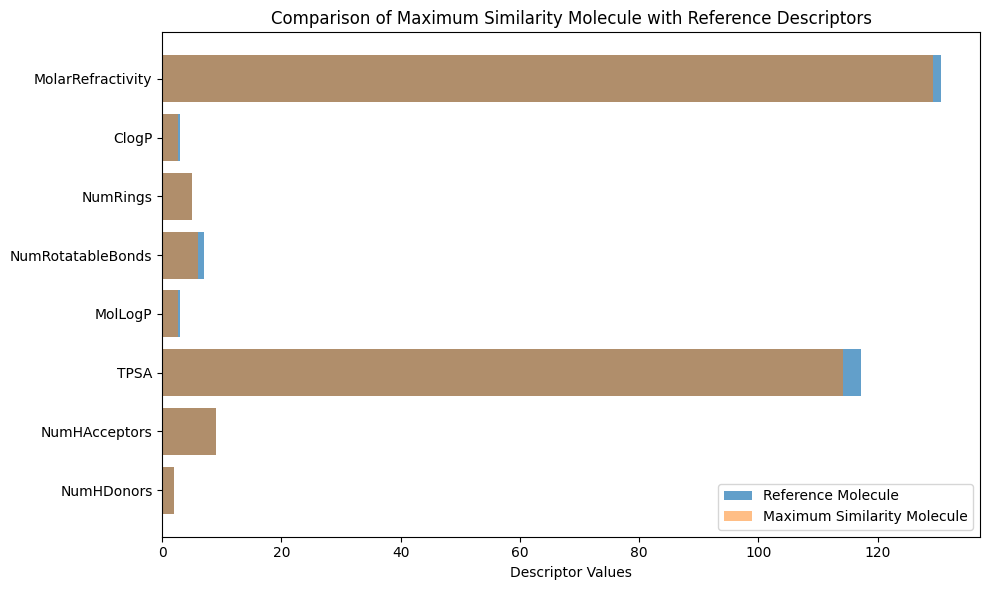

In [6]:

# Data for the molecule with the maximum value in 'OverallSimilarityToReference' column
max_similarity_row = data.loc[data['OverallSimilarityToReference'].idxmax()]

# Reference Descriptors
reference_descriptors = {
    'NumHDonors': 2,
    'NumHAcceptors': 9,
    'TPSA': 117.18,
    'MolLogP': 3.0549,
    'NumRotatableBonds': 7,
    'NumRings': 5,
    'ClogP': 3.0549,
    'MolarRefractivity': 130.6471
}

# Extracting relevant descriptors
reference_data = [reference_descriptors[key] for key in reference_descriptors]
molecule_data = [
    max_similarity_row['NumHDonors'],
    max_similarity_row['NumHAcceptors'],
    max_similarity_row['TPSA'],
    max_similarity_row['MolLogP'],
    max_similarity_row['NumRotatableBonds'],
    max_similarity_row['NumRings'],
    max_similarity_row['ClogP'],
    max_similarity_row['MolarRefractivity']
]

# Descriptor labels
descriptors = list(reference_descriptors.keys())

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(descriptors, reference_data, label='Reference Molecule', alpha=0.7)
plt.barh(descriptors, molecule_data, label='Maximum Similarity Molecule', alpha=0.5)
plt.xlabel('Descriptor Values')
plt.title('Comparison of Maximum Similarity Molecule with Reference Descriptors')
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
# Assuming 'data' is your DataFrame

# Filtering and sorting the DataFrame by 'OverallSimilarityToReference' for top 20 values
best_5 = data.sort_values('OverallSimilarityToReference', ascending=False)[:5]

# Extracting top 5 SMILES from the 'GeneratedSMILES' column
top_5_smiles = best_5['GeneratedSMILES'].tolist()

# Exporting to a text file
with open('top_5_smiles_REINVENT4_lead_frag.txt', 'w') as file:
    for smile in top_5_smiles:
        file.write(smile + '\n')

# Displaying the first two SMILES for verification
print(top_5_smiles[0])  # First SMILE
print(top_5_smiles[1])  # Second SMILE

# Displaying the DataFrame of top 5 for reference
best_5


O=C(Cn1c(N2CCOCC2)nc2cc(Nc3ccc(F)cc3)ncc2c1=O)Nc1ccc(F)cn1
Cc1cccc(-c2ncc3c(=O)n(CC(=O)Nc4ccc(Cl)cn4)c(N4CCOCC4)nc3n2)c1


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,file
1302,O=C(Cn1c(N2CCOCC2)nc2cc(Nc3ccc(F)cc3)ncc2c1=O)...,0.234234,0.334436,0.499721,493.474,2,9,114.27,2.68360,6,5,2.68360,129.3374,0.753406,mol2mol_medium_similarity.csv
898,Cc1cccc(-c2ncc3c(=O)n(CC(=O)Nc4ccc(Cl)cn4)c(N4...,0.247863,0.470225,0.475428,491.939,1,9,115.13,2.68562,6,5,2.68562,132.6747,0.746077,mol2mol_scaffold_generic_pharmacophore.csv
125,O=C(Cn1c(N2CCOCC2)nc2nc(N3CCSCC3)ncc2c1=O)Nc1c...,0.217391,0.458781,0.470030,502.988,1,11,118.37,1.26340,5,5,1.26340,132.0397,0.696253,mol2mol_mmp_pharmacophore.csv
1296,O=C(Cn1c(N2CCOCC2)nc2cc(Nc3ccc(Cl)cc3)ncc2c1=O...,0.270270,0.364861,0.504001,491.939,2,9,114.27,3.05880,6,5,3.05880,134.4314,0.653072,mol2mol_medium_similarity.csv
673,O=C(Cn1c(N2CCOCC2)nc2nc(Nc3ccccc3)ncc2c1=O)Nc1...,0.254545,0.396982,0.470321,491.939,2,9,114.27,3.05880,6,5,3.05880,134.4314,0.651566,mol2mol_similarity.csv


In [8]:
data.sort_values('SimilarityToReference', ascending=False)[11:20]


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,file
118,O=C(Cn1c(N2CCOCC2)nc2nc(N3CCOCC3)ncc2c1=O)Nc1n...,0.285714,0.421727,0.497476,470.465,1,11,127.60,0.03250,5,5,0.03250,120.4817,0.252103,mol2mol_mmp_pharmacophore.csv
928,COc1ccc(NC(=O)Cn2c(N3CCOCC3)nc3cc(-c4ccccc4)nc...,0.284404,0.418314,0.481073,471.517,1,8,98.58,2.94240,7,5,2.94240,133.8897,0.007535,mol2mol_scaffold_generic_pharmacophore.csv
63,COc1ccc(-c2ncc3c(=O)n(CC(=O)Nc4ccc(Cl)cn4)c(N4...,0.283186,0.260272,0.490962,507.938,1,10,124.36,2.38580,7,5,2.38580,134.4897,0.017106,mol2mol_mmp_pharmacophore.csv
599,COc1ccc(NC(=O)Cn2c(N3CCOCC3)nc3cc(-c4ccc(Cl)cc...,0.281818,0.251412,0.469084,504.974,1,7,85.69,4.20080,7,5,4.20080,141.1047,0.005929,mol2mol_scaffold_generic_MiniFrag.csv
1383,O=C(Cn1c(N2CCOCC2)nc2nc(Nc3ccc(F)cc3)ncc2c1=O)...,0.281818,0.240661,0.528706,476.472,2,10,127.16,1.93950,6,5,1.93950,127.1744,0.010763,mol2mol_medium_similarity.csv
1316,CCOc1ccc(Nc2ncc3c(=O)n(CC(=O)Nc4ccc(Cl)cc4)c(N...,0.280702,0.281533,0.472596,535.992,2,10,123.50,3.45750,9,5,3.45750,145.6004,0.006404,mol2mol_medium_similarity.csv
686,COc1ccc(NC(=O)Cn2c(N3CCOCC3)nc3cc(Cl)ccc3c2=O)cc1,0.280374,0.314120,0.463516,428.876,1,7,85.69,2.53380,6,4,2.53380,115.6687,0.003348,mol2mol_similarity.csv
678,Cc1ccc(NC(=O)Cn2c(N3CCOCC3)nc3cc(Cl)ncc3c2=O)cc1,0.280374,0.378693,0.435705,413.865,1,7,89.35,2.22862,5,4,2.22862,111.6487,0.002954,mol2mol_similarity.csv
1458,COC1CCN(c2nc3ccc(Cl)cc3c(=O)n2CC(=O)Nc2ccc(Cl)...,0.280374,0.412795,0.492114,462.337,1,7,89.35,3.35220,6,4,3.35220,121.1337,0.005161,mol2mol_high_similarity.csv


In [9]:
data.sort_values('ESP', ascending=False)[:10]


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,file
317,Cc1nc(C2CCCN(Cc3ccccc3)C2)nc(C)c1CC(=O)Nc1ccccc1F,0.234234,0.595701,0.451084,432.543,1,4,58.12,4.79334,8,4,4.79334,123.9337,0.002192,mol2mol_mmp_Asinex.csv
333,Cc1nc(C2CCCN(C(=O)CC(C)(C)C)C2)nc(C)c1CC(=O)Nc...,0.243243,0.572807,0.500190,440.563,1,4,75.19,4.55594,7,3,4.55594,122.8667,0.002915,mol2mol_mmp_Asinex.csv
1658,Cn1c2ccccc2c2nc(C=C3C(=O)Nc4ccccc43)ccc21,0.127273,0.556183,0.533743,325.371,1,3,46.92,4.21920,2,5,4.21920,101.1627,0.000631,sampling_reinvent_lead_2nd_step.csv
400,CC(C)NC(=O)C1(Cc2ccc(-c3cccnc3)cc2)CCN(C(=O)C(...,0.218182,0.536634,0.492397,407.558,1,3,62.30,4.08050,10,3,4.08050,119.7407,0.001817,mol2mol_mmp_Asinex.csv
145,O=C(Cn1c(N2CCOCC2)nc2nc(Nc3ccccc3F)ncc2c1=O)Nc...,0.265487,0.533817,0.509720,510.917,2,10,127.16,2.59290,6,5,2.59290,132.1844,0.012648,mol2mol_mmp_pharmacophore.csv
457,Cc1ccncc1CN1CCCC(c2nc(C)c(CC(=O)Nc3ccccc3F)c(C...,0.241379,0.527461,0.448213,447.558,1,5,71.01,4.49676,9,4,4.49676,126.4657,0.002904,mol2mol_scaffold_generic_Asinex.csv
348,CCC(=O)N1CCCC(c2nc(C)c(CC(=O)Nc3ccccc3F)c(C)n2)C1,0.234234,0.526146,0.464940,398.482,1,4,75.19,3.52974,8,3,3.52974,109.0857,0.001983,mol2mol_mmp_Asinex.csv
351,Cc1nc(C2CCCN(C(=O)C3CC3)C2)nc(C)c1CC(=O)Nc1ccc...,0.236364,0.523569,0.473129,410.493,1,4,75.19,3.52974,7,4,3.52974,111.5187,0.074622,mol2mol_mmp_Asinex.csv
436,Cc1nc(C2CCCN(Cc3cccc(F)c3)C2)nc(C)c1CC(=O)Nc1c...,0.245614,0.521918,0.467998,450.533,1,4,58.12,4.93244,8,4,4.93244,123.8917,0.002533,mol2mol_scaffold_generic_Asinex.csv
475,CCC(CC)C(=O)N1CCCC(c2nc(C)nc(C)c2CC(=O)Nc2cccc...,0.210084,0.521511,0.464761,440.563,1,4,75.19,4.55594,11,3,4.55594,122.8667,0.002514,mol2mol_scaffold_generic_Asinex.csv


In [10]:
data.sort_values('shape', ascending=False)[:10]


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,file
1604,NC(=O)C(c1ccccc1)c1nc2ccccc2nc1N1CCN(C2CCCCC2)CC1,0.135135,0.249646,0.596115,429.568,1,5,75.35,3.70170,5,5,3.70170,127.6764,0.001488,sampling_reinvent_lead_2nd_step.csv
1598,CC1(C)Cc2c(c(N3CCOCC3)nc3sc(C(=O)Nc4ccccc4Cl)c...,0.200000,0.361117,0.593528,472.998,2,7,89.71,4.47210,6,5,4.47210,129.0416,0.154876,sampling_reinvent_lead_2nd_step.csv
1657,c1ccc(CCNC2CCN(C3CCOCC3)C(c3nccc4ccccc34)C2)cc1,0.168142,0.452470,0.584699,415.581,1,4,37.39,4.75160,6,5,4.75160,126.2017,0.001198,sampling_reinvent_lead_2nd_step.csv
1357,COc1ccc(-c2cc3cnc(N4CCOCC4)nc3nc2N2CCOCC2)cc1,0.242424,0.420972,0.583952,407.474,0,8,72.84,2.37360,5,5,2.37360,115.3850,0.002177,mol2mol_medium_similarity.csv
1682,COC(=O)COc1ccccc1C1=NOC(c2ccc(OC)cc2)C1,0.240385,0.356639,0.557448,341.363,0,6,66.35,3.11270,8,3,3.11270,91.9270,0.001360,sampling_reinvent_lead_2nd_step.csv
1589,O=C1C(CO)=CC(c2ccccc2)Oc2ccc(C=Cc3ccc(O)cc3)cc21,0.115044,0.196124,0.551894,384.431,2,4,66.76,4.79770,6,4,4.79770,112.7871,0.000849,sampling_reinvent_lead_2nd_step.csv
604,CC(C(=O)Nc1ccc(Cl)cn1)n1c(N2CCOCC2)nc2cc(N3CCO...,0.215517,0.334515,0.546599,498.971,1,9,101.82,2.31780,6,5,2.31780,134.6547,0.009269,mol2mol_scaffold_generic_MiniFrag.csv
1495,O=C(Cn1c(N2CCOCC2)nc2nc(N3CCOCC3)ncc2c1=O)Nc1c...,0.234234,0.449216,0.546485,491.552,1,10,114.71,0.98710,5,6,0.98710,134.7537,0.024462,mol2mol_high_similarity.csv
621,Cc1cccc(NC(=O)Cn2c(N3CCOCC3)nc3cc(N4CCN(C)CC4)...,0.220339,0.375904,0.543734,477.569,1,9,95.83,1.32702,7,5,1.32702,136.3487,0.005889,mol2mol_scaffold_generic_MiniFrag.csv
380,Cn1cc(-c2ccncc2)c(-c2cccc(CNC(=O)c3ccccn3)c2)n1,0.222222,0.441150,0.541799,369.428,1,5,72.70,3.47410,6,4,3.47410,107.2822,0.001531,mol2mol_mmp_Asinex.csv


In [11]:
data.sort_values('TPSA', ascending=False)[:10]


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,file
1578,Cc1ccc(NCCCC(=O)Nc2[nH]c(=O)[nH]c(=O)c2NC(=O)C...,0.132353,0.203129,0.396538,641.685,6,8,208.19,3.70726,16,4,3.70726,177.8161,0.000660,sampling_reinvent_lead_2nd_step.csv
1673,N#CC1CC(O)CCC1n1cc(C(N)=O)c(=Nc2ccc(S(N)(=O)=O...,0.121951,0.180039,0.483747,404.452,4,7,180.35,0.02058,6,3,0.02058,98.3366,0.000912,sampling_reinvent_lead_2nd_step.csv
1694,COc1ccc(C(C(=O)C(CC(=O)C(C)=CCc2cc(O)c(O)c(OC)...,0.114504,0.323961,0.412990,700.737,4,12,178.28,5.90030,26,4,5.90030,186.9427,0.000497,sampling_reinvent_lead_2nd_step.csv
1646,Cc1ccc(C(=O)OC2C(CO)OC(n3cnc(C(N)=O)n3)C2O)[nH]1,0.166667,0.397889,0.475666,351.319,4,9,165.58,-1.51028,8,3,-1.51028,80.2757,0.000982,sampling_reinvent_lead_2nd_step.csv
1645,CCOC(=O)C(CCCNC(=O)c1cnc2ccccc2n1)NC(=O)C(Cc1c...,0.133333,0.438149,0.430285,602.692,4,8,164.40,3.80500,13,4,3.80500,164.8293,0.001019,sampling_reinvent_lead_2nd_step.csv
1679,C#CCNC(=O)Cn1cnc(C)c1C#CCC1CC(O)C(n2cnc3c(=NC(...,0.197080,0.290001,0.443312,505.539,4,9,164.34,-0.26588,9,4,-0.26588,131.3499,0.002878,sampling_reinvent_lead_2nd_step.csv
308,O=C(Cn1c(N2CCOCC2)nc2nc(N(CCO)CCO)ncc2c1=O)Nc1...,0.228070,0.380527,0.389981,504.935,3,12,158.83,-0.49880,11,4,-0.49880,128.8863,0.003745,mol2mol_mmp_MiniFrag.csv
1720,Cc1n[nH]c(C)c1S(=O)(=O)NC(=O)C(COc1ccc(Cl)cc1F...,0.246377,0.391291,0.431461,654.067,3,8,158.40,3.96074,14,5,3.96074,152.7176,0.001448,sampling_reinvent_lead_2nd_step.csv
1706,CN1CCN(c2ccc3c(=O)nc(-c4cc(C5OC(CO)C(O)C(O)C5O...,0.182540,0.322651,0.510822,571.634,6,9,158.17,1.49130,9,7,1.49130,159.5926,0.001825,sampling_reinvent_lead_2nd_step.csv
1637,Cc1ccc(NC(=O)c2cc(NS(C)(=O)=O)ccc2N2CCCC2)cc1N...,0.162963,0.326016,0.409073,603.709,3,10,157.80,2.95432,9,6,2.95432,165.4264,0.001281,sampling_reinvent_lead_2nd_step.csv


In [12]:
best_5
value = best_5.iloc[1, best_5.columns.get_loc('GeneratedSMILES')]
top_smile = best_5.iloc[0, best_5.columns.get_loc('GeneratedSMILES')]
value

'Cc1cccc(-c2ncc3c(=O)n(CC(=O)Nc4ccc(Cl)cn4)c(N4CCOCC4)nc3n2)c1'

In [13]:
# Save the SMILES value to a file named 'output.smi'
with open('output.smi', 'w') as file:
    file.write(value)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 32.4 MB/s eta 0:00:00


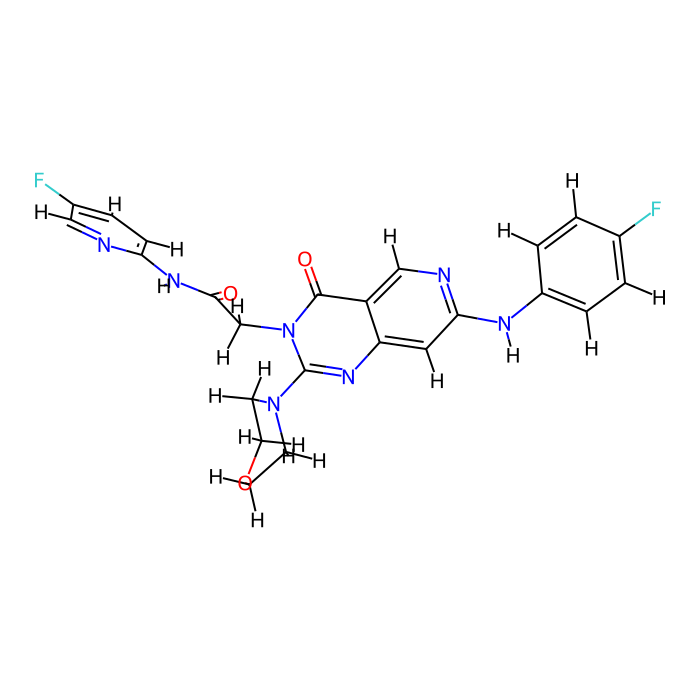

In [14]:
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from IPython.display import display

smiles_string = top_smile
# Generate 3D structure
# Your ML-generated SMILES string
# smiles_string = "O=C(c1ccc2ccoc2c1)N1CCC(C(=O)N2CCCC2)CC1"
mol = Chem.MolFromSmiles(smiles_string)
mol = Chem.AddHs(mol)

# Experiment with different parameters
AllChem.EmbedMolecule(mol, randomSeed=42)  # Try different seeds
AllChem.MMFFOptimizeMolecule(mol, maxIters=1000, nonBondedThresh=100.0)  # Adjust optimization parameters

# Visualize the 3D structure
img = Draw.MolToImage(mol, size=(700, 700))
display(img)


In [15]:
!pip install py3Dmol

from IPython.display import display, HTML
import py3Dmol
# Visualize the 3D structure
viewer = py3Dmol.view(width=400, height=400)
viewer.addModel(Chem.MolToMolBlock(mol), "mol")
viewer.setStyle({'stick': {}})
viewer.setBackgroundColor('white')
viewer.zoomTo()
viewer.show()



You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [16]:
# Save to SDF file
sdf_file = "output.sdf"
w_sdf = Chem.SDWriter(sdf_file)
w_sdf.write(mol)
w_sdf.close()


In [17]:
!pip install pandas matplotlib seaborn scikit-learn


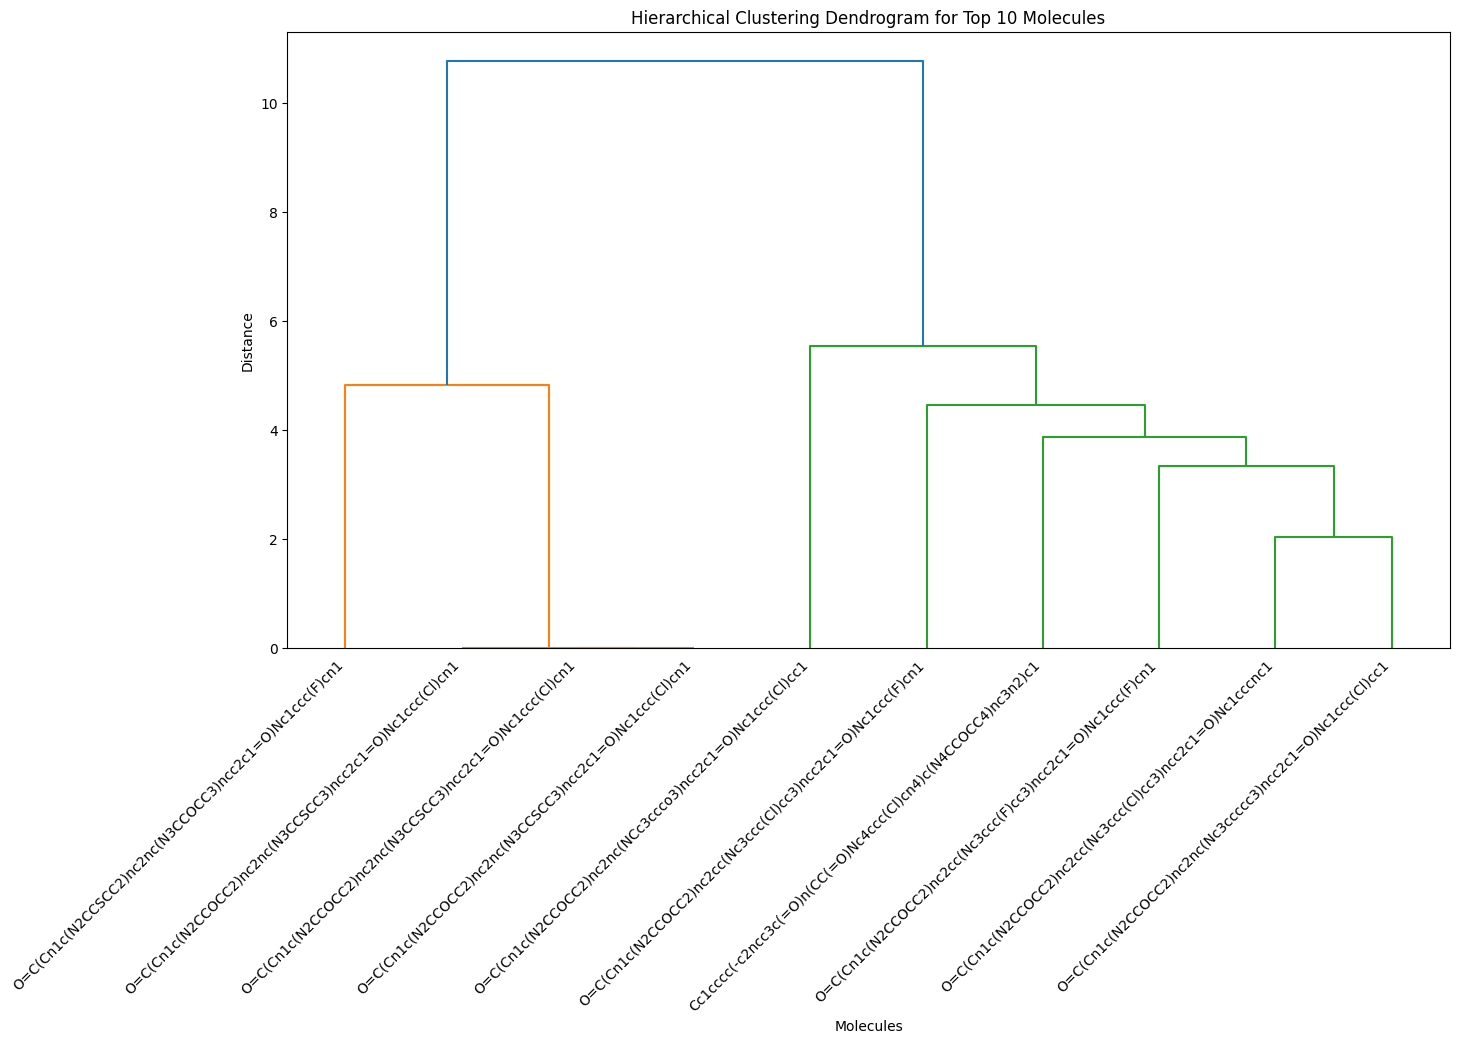


Cluster 1:
125     O=C(Cn1c(N2CCOCC2)nc2nc(N3CCSCC3)ncc2c1=O)Nc1c...
288     O=C(Cn1c(N2CCOCC2)nc2nc(N3CCSCC3)ncc2c1=O)Nc1c...
1237    O=C(Cn1c(N2CCOCC2)nc2nc(N3CCSCC3)ncc2c1=O)Nc1c...
859     O=C(Cn1c(N2CCSCC2)nc2nc(N3CCOCC3)ncc2c1=O)Nc1c...
Name: GeneratedSMILES, dtype: object

Average Values:
SimilarityToReference      0.215217
ESP                        0.442057
shape                      0.476664
MolecularWeight          498.874250
NumHDonors                 1.000000
NumHAcceptors             11.000000
TPSA                     118.370000
MolLogP                    1.134825
NumRotatableBonds          5.000000
NumRings                   5.000000
ClogP                      1.134825
MolarRefractivity        130.776700
dtype: float64

Cluster 2:
1302    O=C(Cn1c(N2CCOCC2)nc2cc(Nc3ccc(F)cc3)ncc2c1=O)...
898     Cc1cccc(-c2ncc3c(=O)n(CC(=O)Nc4ccc(Cl)cn4)c(N4...
1296    O=C(Cn1c(N2CCOCC2)nc2cc(Nc3ccc(Cl)cc3)ncc2c1=O...
673     O=C(Cn1c(N2CCOCC2)nc2nc(Nc3ccccc3)ncc2c1=O)Nc1...
1393    O=C

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
<ipython-input-18-fe9ce3dfff6f>:52: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_values = cluster_data.mean()
<ipython-input-18-fe9ce3dfff6f>:52: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_values = cluster_data.mean()
<ipython-input-18-fe9ce3dfff6f>:52: FutureWarning: The default value of numeric_only in DataFra

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# Load data
data = pd.read_csv('REINVENT4_lead_frag_output_data.csv')

# Select the top 10 molecules based on 'OverallSimilarityToReference'
top_10 = data.nlargest(10, 'OverallSimilarityToReference')

# Extract relevant features for clustering
features = top_10[['SimilarityToReference', 'ESP', 'shape', 'MolecularWeight', 'NumHDonors', 'NumHAcceptors',
                   'TPSA', 'MolLogP', 'NumRotatableBonds', 'NumRings', 'ClogP', 'MolarRefractivity']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Calculate pairwise distances
distances = pdist(scaled_features, metric='euclidean')

# Perform hierarchical clustering
linkage_matrix = linkage(distances, method='ward')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, labels=top_10['GeneratedSMILES'].tolist(), orientation='top', leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram for Top 10 Molecules')
plt.xlabel('Molecules')
plt.ylabel('Distance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

plt.show()

# Choose the number of clusters based on dendrogram or other criteria
num_clusters = 3  # Adjust as needed

# Perform clustering with AgglomerativeClustering
cluster_model = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
top_10['Cluster'] = cluster_model.fit_predict(scaled_features)

# Print the clustered molecules in the top 10
for cluster_id in range(num_clusters):
    cluster_data = top_10[top_10['Cluster'] == cluster_id]
    print(f'\nCluster {cluster_id + 1}:')
    print(cluster_data['GeneratedSMILES'])

    # Provide interpretation based on average values of features
    avg_values = cluster_data.mean()
    print('\nAverage Values:')
    print(avg_values[features.columns])
